In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Activation,MaxPool2D
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from tensorflow.keras.optimizers.legacy import Adam
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import os
import pandas as pd
import math

base_directory = "Fruits Dataset"
class_folders = [folder for folder in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, folder))]

file_paths = []
class_labels = []

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(base_directory, class_folder)
    # Get list of image files in the class folder
    class_files = [os.path.join(class_path, filename) for filename in os.listdir(class_path) if filename.endswith('.jpg')]
    class_files.sort()  # Sort the files to ensure a consistent order
    # Extend the lists with file paths and corresponding class labels
    file_paths.extend(class_files)
    class_labels.extend([class_folder] * len(class_files))

data = pd.DataFrame({'Filename': file_paths, 'Class': class_labels})

train_data_list = []
val_data_list = []
test_data_list = []

# Split data by class, ensuring proper distribution 
for class_folder in class_folders:
    # Filter the data for the current class
    class_data = data[data['Class'] == class_folder]
    total_samples = len(class_data)
    test_samples = math.ceil(0.15 * total_samples)  
    val_samples = math.ceil(0.15 * total_samples)  
    train_samples = total_samples - test_samples - val_samples  

    test_data_list.append(class_data.iloc[:test_samples])
    val_data_list.append(class_data.iloc[test_samples:test_samples + val_samples])
    train_data_list.append(class_data.iloc[test_samples + val_samples:])

train_data = pd.concat(train_data_list).reset_index(drop=True)
val_data = pd.concat(val_data_list).reset_index(drop=True)
test_data = pd.concat(test_data_list).reset_index(drop=True)

image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    brightness_range=(0.7, 1.3),
    channel_shift_range=10.0,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory="",
    x_col="Filename",
    y_col="Class",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 7567 validated image filenames belonging to 16 classes.
Found 1633 validated image filenames belonging to 16 classes.
Found 1633 validated image filenames belonging to 16 classes.


In [3]:
train_data

,Filename,Class
0,Fruits Dataset/FreshBanana/FreshBanana (353).jpg,FreshBanana
1,Fruits Dataset/FreshBanana/FreshBanana (354).jpg,FreshBanana
2,Fruits Dataset/FreshBanana/FreshBanana (355).jpg,FreshBanana
3,Fruits Dataset/FreshBanana/FreshBanana (356).jpg,FreshBanana
4,Fruits Dataset/FreshBanana/FreshBanana (357).jpg,FreshBanana
...,...,...
7562,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
7563,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
7564,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
7565,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate


In [4]:
val_data

,Filename,Class
0,Fruits Dataset/FreshBanana/FreshBanana (226).jpg,FreshBanana
1,Fruits Dataset/FreshBanana/FreshBanana (227).jpg,FreshBanana
2,Fruits Dataset/FreshBanana/FreshBanana (228).jpg,FreshBanana
3,Fruits Dataset/FreshBanana/FreshBanana (229).jpg,FreshBanana
4,Fruits Dataset/FreshBanana/FreshBanana (23).jpg,FreshBanana
...,...,...
1628,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
1629,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
1630,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate
1631,Fruits Dataset/FreshPomegranate/FreshPomgranat...,FreshPomegranate


In [5]:
test_data

,Filename,Class
0,Fruits Dataset/FreshBanana/FreshBanana (1).jpg,FreshBanana
1,Fruits Dataset/FreshBanana/FreshBanana (10).jpg,FreshBanana
2,Fruits Dataset/FreshBanana/FreshBanana (100).jpg,FreshBanana
3,Fruits Dataset/FreshBanana/FreshBanana (101).jpg,FreshBanana
4,Fruits Dataset/FreshBanana/FreshBanana (102).jpg,FreshBanana
...,...,...
1628,Fruits Dataset/FreshPomegranate/FreshPomegrana...,FreshPomegranate
1629,Fruits Dataset/FreshPomegranate/FreshPomegrana...,FreshPomegranate
1630,Fruits Dataset/FreshPomegranate/FreshPomegrana...,FreshPomegranate
1631,Fruits Dataset/FreshPomegranate/FreshPomegrana...,FreshPomegranate


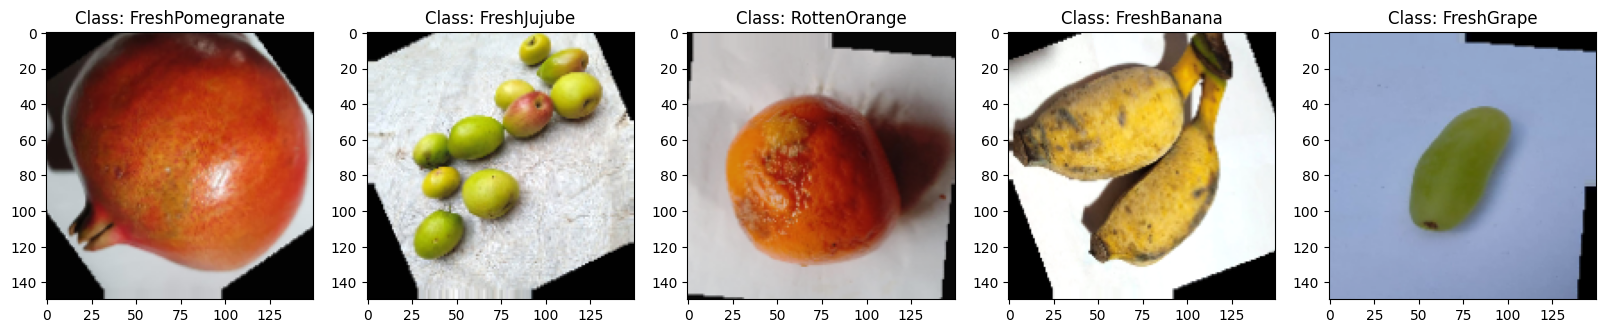

In [6]:
sample_images, sample_labels = next(train_generator)

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axes[i].imshow(sample_images[i])
    class_label = sample_labels[i]
    class_index = np.argmax(class_label)
    class_names = list(train_generator.class_indices.keys())
    class_name = class_names[class_index]  
    axes[i].set_title("Class: " + class_name)

plt.show()



In [7]:
# Define the model
model = Sequential()

# Input Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 1
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='softmax'))


2024-05-07 13:32:47.610236: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-07 13:32:47.610283: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-07 13:32:47.610295: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-07 13:32:47.610384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-07 13:32:47.610448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        3

In [9]:
# Define the number of epochs
epochs = 100

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100


2024-02-16 12:06:57.363837: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


270/270 [==============================] - 291s 1s/step - loss: 1.4304 - accuracy: 0.5060 - val_loss: 0.8126 - val_accuracy: 0.7093
Epoch 2/100
270/270 [==============================] - 184s 681ms/step - loss: 0.8238 - accuracy: 0.7101 - val_loss: 0.6086 - val_accuracy: 0.7917
Epoch 3/100
270/270 [==============================] - 185s 686ms/step - loss: 0.5980 - accuracy: 0.7875 - val_loss: 0.4341 - val_accuracy: 0.8551
Epoch 4/100
270/270 [==============================] - 184s 681ms/step - loss: 0.4781 - accuracy: 0.8316 - val_loss: 0.3321 - val_accuracy: 0.8949
Epoch 5/100
270/270 [==============================] - 184s 681ms/step - loss: 0.4102 - accuracy: 0.8521 - val_loss: 0.4015 - val_accuracy: 0.8617
Epoch 6/100
270/270 [==============================] - 185s 685ms/step - loss: 0.3320 - accuracy: 0.8838 - val_loss: 0.2895 - val_accuracy: 0.8939
Epoch 7/100
270/270 [==============================] - 182s 674ms/step - loss: 0.3208 - accuracy: 0.8872 - val_loss: 0.2486 - val_acc

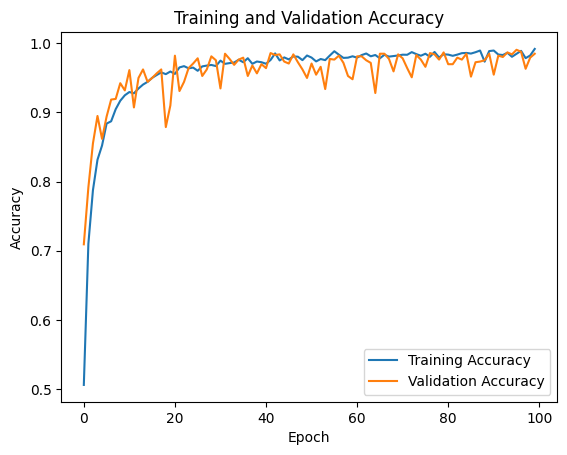

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

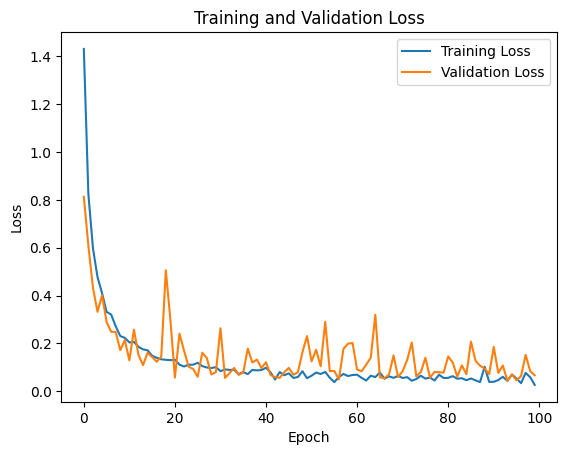

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model and its weights
model.save('my_model.h5')
model.save('my_model.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true classes for the test set
y_true = test_generator.classes

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test accuracy
print("Test Accuracy:", test_accuracy)


51/51 [==============================] - 25s 491ms/step - loss: 0.0027 - accuracy: 0.9994
Test Accuracy: 0.9993842244148254


In [26]:
# Compute classification report
class_names = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Print classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
                   precision    recall  f1-score   support

       FreshApple       1.00      1.00      1.00       143
      FreshBanana       1.00      1.00      1.00       143
       FreshGrape       1.00      1.00      1.00        78
       FreshGuava       1.00      1.00      1.00        92
      FreshJujube       1.00      1.00      1.00        76
      FreshOrange       1.00      1.00      1.00       104
 FreshPomegranate       1.00      1.00      1.00       144
  FreshStrawberry       1.00      1.00      1.00        91
      RottenApple       1.00      0.99      0.99        96
     RottenBanana       1.00      1.00      1.00       100
      RottenGrape       1.00      1.00      1.00        78
      RottenGuava       0.99      1.00      0.99        91
     RottenJujube       1.00      1.00      1.00       104
     RottenOrange       1.00      1.00      1.00        90
RottenPomegranate       1.00      1.00      1.00       100
 RottenStrawberry       1.00   

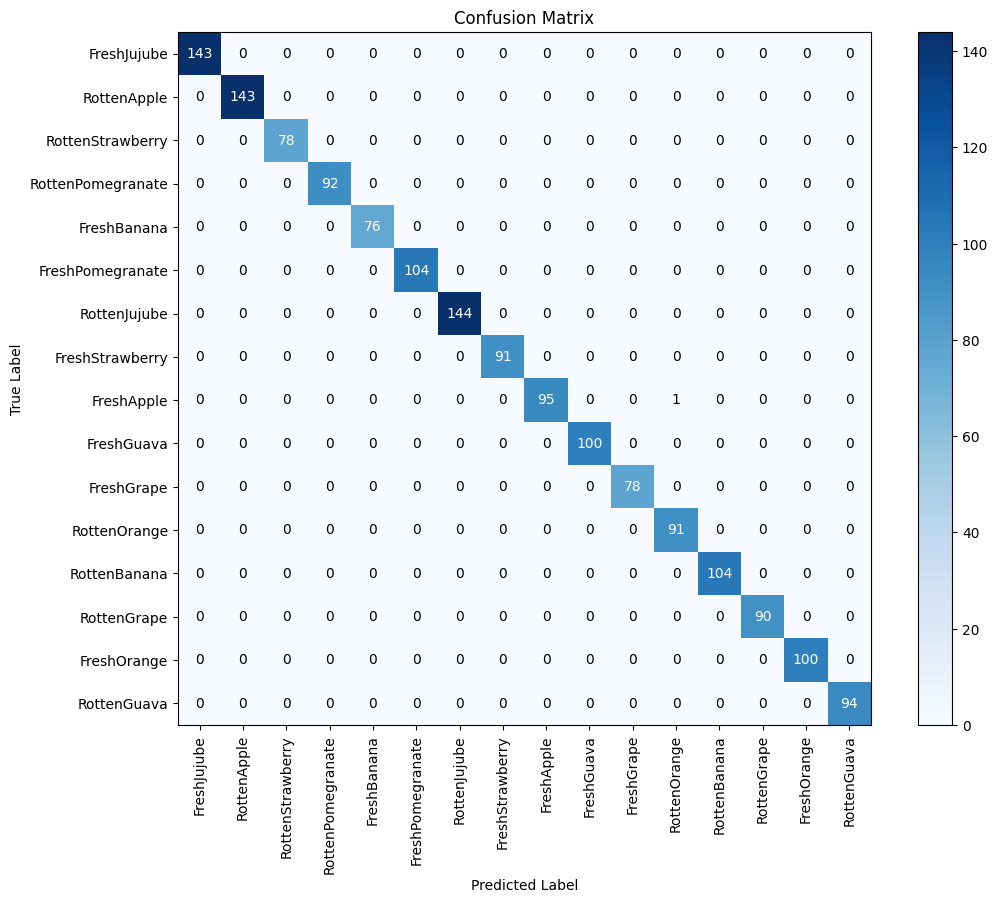

In [27]:
class_labels = set(class_labels)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 9))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_labels)), class_labels,rotation=90)
plt.yticks(np.arange(len(class_labels)), class_labels)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()


In [28]:
# Calculate train accuracy
train_loss, train_accuracy = model.evaluate(train_generator)
print("Train Accuracy:", train_accuracy)

# Calculate validation accuracy
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print("Validation Accuracy:", validation_accuracy)


237/237 [==============================] - 152s 642ms/step - loss: 0.0109 - accuracy: 0.9974
Train Accuracy: 0.997362494468689
51/51 [==============================] - 26s 499ms/step - loss: 0.0566 - accuracy: 0.9822
Validation Accuracy: 0.9821648001670837


### Loading and Testing model

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model_path = 'my_model.h5' 
model = load_model(model_path)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


52/52 [==============================] - 61s 1s/step - loss: 2.0918 - accuracy: 0.8610
Test Accuracy: 0.8609920144081116


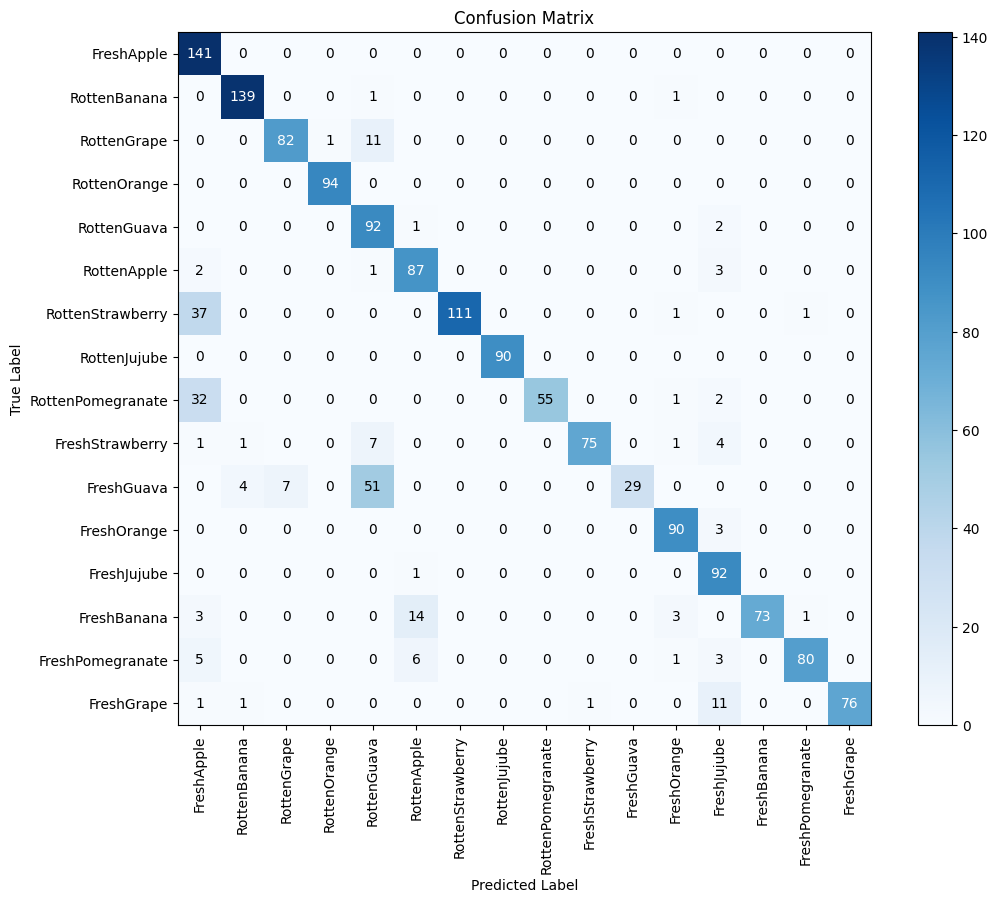

In [34]:
class_labels = set(class_labels)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 9))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(class_labels)), class_labels,rotation=90)
plt.yticks(np.arange(len(class_labels)), class_labels)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()

In [11]:
from keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = img / 255.0 
    img = np.expand_dims(img, axis=0) 
    return img

1/1 [==============================] - 0s 120ms/step


2024-05-07 13:33:59.418133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Predicted Class: RottenBanana


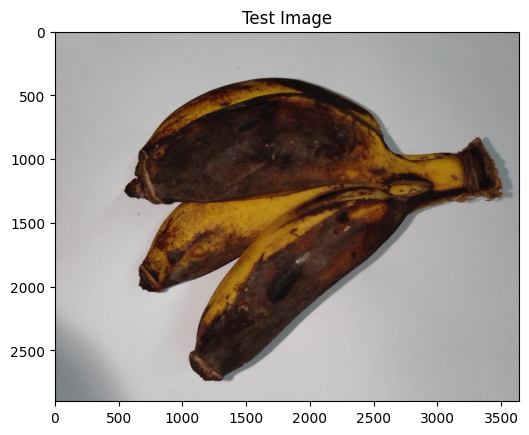

In [12]:
test_image_path = '/Users/parimal/Downloads/Mini Project/Fruits Dataset/RottenBanana/RottenBanana (1).jpg'
test_image = load_and_preprocess_image(test_image_path)
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction, axis=1)[0] 

class_labels = list(train_generator.class_indices.keys())  

# Print the predicted class
print("Predicted Class:", class_labels[predicted_class])

# Visualize the test image
plt.imshow(image.load_img(test_image_path))
plt.title("Test Image")
plt.show()
